### Importing Necessary library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import emoji

In [3]:
pd.options.display.max_colwidth = 200

In [4]:
# Reading the Dataset
data = pd.read_csv("Tweet_NFT.csv")
data.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artists #animation #illustrators #illustrations #illustrationart #NFT #NFTGiveaways #3Danimation #3dart #conceptart #Concept #illustrators #SolanaNFTs #Arti...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabearsnft @elonmusk Great choice on a Tesla! Good luck!,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in crypto with move to earn #AstroBirdz. Big things happening with this project with release of marketplace and #NEST.\n#FeedToEarn . \n #birdzarmy \n ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with move to earn #AstroBirdz. Big things happening with this project with release of marketplace and #NEST.\n#FeedToEarn . \n #birdzarmy \n #luna #BTC #...,2022-08-06T16:56:34.000Z,Community


In [5]:
data.columns

Index(['id', 'tweet_text', 'tweet_created_at', 'tweet_intent'], dtype='object')

In [6]:
# Rearranging the columns
data = data[['id', 'tweet_created_at', 'tweet_text', 'tweet_intent']]

In [7]:
data.shape

(127453, 4)

In [8]:
# checking the null values
data.isnull().mean()

id                  0.000000
tweet_created_at    0.000000
tweet_text          0.000000
tweet_intent        0.243925
dtype: float64

In [9]:
data[data.tweet_intent.isnull()].head()

,id,tweet_created_at,tweet_text,tweet_intent
96364,1212764,2022-08-06T16:56:35.000Z,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...,NaN
96365,1212770,2022-08-06T16:56:33.000Z,@asksabir007 @dao_lm Don't miss the chance to win NFT worth of 1000Each Just simple step with clicking the link below and finish some easy task that will be. Come join us now and earn your NFT col...,NaN
96366,1212773,2022-08-06T16:56:33.000Z,This zesty faucet from @_bitcoiner is making me tweet this to claim my free NEFTY tokens. âš¡\n\n@_bitcoiner unlock me 4255a896-9e33-45c6-b800-e9d64a0511c1\n\n#NEFTY #NFT $NEFTY https://t.co/YxboP...,NaN
96367,1212804,2022-08-06T16:56:23.000Z,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...,NaN
96368,1212776,2022-08-06T16:56:32.000Z,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s talk about some marketing for your project",NaN


In [10]:
# placing all the values having tweet intent
df = data[data.tweet_intent.isnull() == False].copy()
df.shape


(96364, 4)

there are 96364 values having tweet intent

In [11]:
# placing all the values having tweet intent as null into test set
test_df = data[data.tweet_intent.isnull() == True].copy()
test_df.shape

(31089, 4)

there are 31089 values having tweet intent as null

In [12]:
# checking the column info
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96364 entries, 0 to 96363
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                96364 non-null  int64 
 1   tweet_created_at  96364 non-null  object
 2   tweet_text        96364 non-null  object
 3   tweet_intent      96364 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [15]:
df.head()

,id,tweet_created_at,tweet_text,tweet_intent
0,1212762,2022-08-06,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ...,Community
1,1212763,2022-08-06,Need Sick Character artâ“#art #artist #Artists #animation #illustrators #illustrations #illustrationart #NFT #NFTGiveaways #3Danimation #3dart #conceptart #Concept #illustrators #SolanaNFTs #Arti...,Giveaway
2,1212765,2022-08-06,@The_Hulk_NFT @INagotchiNFT @Tesla @killabearsnft @elonmusk Great choice on a Tesla! Good luck!,Appreciation
3,1212766,2022-08-06,@CryptoBatzNFT @DarekBTW The first project in crypto with move to earn #AstroBirdz. Big things happening with this project with release of marketplace and #NEST.\n#FeedToEarn . \n #birdzarmy \n ...,Community
4,1212767,2022-08-06,@sashadysonn The first project in crypto with move to earn #AstroBirdz. Big things happening with this project with release of marketplace and #NEST.\n#FeedToEarn . \n #birdzarmy \n #luna #BTC #...,Community


In [16]:
# checking the distribution of tweet intent into multiclass
df['tweet_intent'].value_counts(normalize=True)*100

Community         43.076253
Giveaway          21.834918
Appreciation      17.071728
Whitelist          8.633930
Presale            5.299697
Done               3.164045
pinksale           0.494998
Interested         0.286414
Launching Soon     0.138018
Name: tweet_intent, dtype: float64

In [17]:
df['tweet_intent'].value_counts().index

Index(['Community', 'Giveaway', 'Appreciation', 'Whitelist', 'Presale', 'Done',
       'pinksale', 'Interested', 'Launching Soon'],
      dtype='object')

We will drop 'Done','pinksale', 'Interested', 'Launching Soon' since it's unnecesarily will effect our model

In [18]:
def mask(value):
    return False if value in ['Done','pinksale', 'Interested', 'Launching Soon'] else True
masked = df.tweet_intent.apply(mask)

In [19]:
df = df[masked]

<AxesSubplot:xlabel='tweet_intent', ylabel='count'>

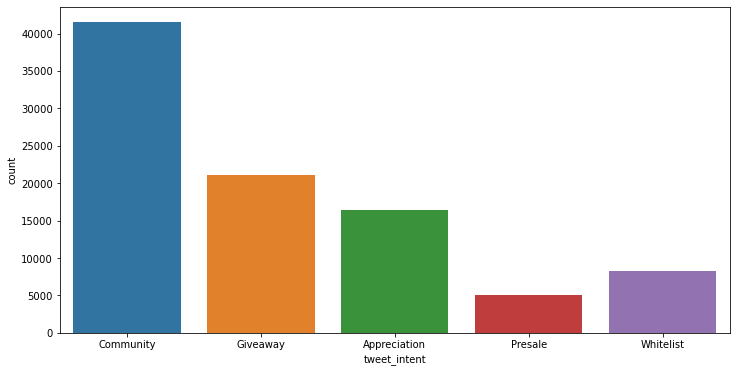

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x="tweet_intent", data=df)

In [21]:
dict = {'Community':0, 'Giveaway':1, 'Appreciation':2, 'Whitelist':3, 'Presale':4}
df['tweet_intent']= df['tweet_intent'].map(dict)

In [22]:
def cleaner(tweet):
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split()) #Remove http links
    tweet =' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split()) #Remove @ and # words
    tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split()) #Remove http links
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI['en'])
    tweet = re.sub("[^a-zA-Z0-9']"," ", tweet) #keeping only english letters and numbers
    tweet = " ".join([word for word in tweet.strip().split()])
    tweet = tweet.lower()
    
    return tweet

to correct the misspelled words but just checking that each character should occur not more than 2 times in every word

In [23]:
df['clean'] = df['tweet_text'].map(lambda x: cleaner(x))

In [24]:
#words like lfgggggg

In [25]:
import itertools
def mis_spelled_words(tweet):
    return ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))

 In order to remove strings such as 8nfl6gvp4rfnh1e5ssjgcjeyb8hhgtyxst82nxk3pdr4 which does
 not add value and also to remove 2 letter word

In [27]:
def remove_mixed_words(sent):
    res = []
    for word in sent.split():
        if word.isnumeric() or word.isalpha():
            if len(word) != 1:
                res.append(word)
        else:
            res.append("")
    return " ".join(res)

let's test the function

In [26]:
sent = df['clean'][6]
sent

'the bridged 9999 sold gt price 2 2 s l 89 01 rank m 9159 rank hr n r fp 2 1 s l owner 8nfl6gvp4rfnh1e5ssjgcjeyb8hhgtyxst82nxk3pdr4 link gt'

In [28]:
print(remove_mixed_words(sent))

the bridged 9999 sold gt price 89 01 rank 9159 rank hr fp owner  link gt


Let's apply all these functions on tweets

In [29]:
df['clean'] = df['clean'].map(lambda x: mis_spelled_words(x))

In [30]:
df['clean'] = df['clean'].map(lambda x: remove_mixed_words(x))

We have sucessfully removed all the missplelled words

In [31]:
new_df = df[['clean', 'tweet_intent']].copy()

In [32]:
new_df.head(50)

,clean,tweet_intent
0,brody nft bowie el krypto new cryptocurrency was born by fans of the chihuahua meme community just simply pets love and keep from each transaction which will be automatically distributed ca bsc tg,0
1,need sick character art rts,1
2,hulk nft great choice on tesla good luck,2
3,the first project in crypto with move to earn big things happening with this project with release of marketplace and,0
4,the first project in crypto with move to earn big things happening with this project with release of marketplace and,0
5,just registered for the saphire on nft,4
6,the bridged 99 sold gt price 89 01 rank 9159 rank hr fp owner link gt,1
7,project 21 the best gamefi project on bsc multistage deflation tool multi feature nft app on appstore and google play presale in august is going to the moon whitelist tg,3
8,feature it on we have great community of nft artists and nft collectors,0
9,project 21 the best gamefi project on bsc multistage deflation tool multi feature nft app on appstore and google play presale in august is going to the moon whitelist tg,3


Let's have a Glance at stop words

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
len(stopwords.words('english'))

179

In [35]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
new_df = new_df.reset_index()

Now applying to whole 92k rows

In [37]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from tqdm import tqdm
corpus = []
for i in tqdm(range(0,len(new_df))):
    tweet = new_df['clean'][i]
    tweet = tweet.split()
    tweet = [ ps.stem(word) for word in tweet if not word in set(stopwords.words('english')) ]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

100%|███████████████████████████████████████████████████████████████████████████| 92429/92429 [09:39<00:00, 159.38it/s]


Let's check our corpus after removing stopwords

In [38]:
corpus[:10]

['brodi nft bowi el krypto new cryptocurr born fan chihuahua meme commun simpli pet love keep transact automat distribut ca bsc tg',
 'need sick charact art rt',
 'hulk nft great choic tesla good luck',
 'first project crypto move earn big thing happen project releas marketplac',
 'first project crypto move earn big thing happen project releas marketplac',
 'regist saphir nft',
 'bridg 99 sold gt price 89 01 rank 9159 rank hr fp owner link gt',
 'project 21 best gamefi project bsc multistag deflat tool multi featur nft app appstor googl play presal august go moon whitelist tg',
 'featur great commun nft artist nft collector',
 'project 21 best gamefi project bsc multistag deflat tool multi featur nft app appstor googl play presal august go moon whitelist tg']

In [39]:
corpus_dataset = pd.DataFrame(corpus,columns=['corpus'])
corpus_dataset.head()

,corpus
0,brodi nft bowi el krypto new cryptocurr born fan chihuahua meme commun simpli pet love keep transact automat distribut ca bsc tg
1,need sick charact art rt
2,hulk nft great choic tesla good luck
3,first project crypto move earn big thing happen project releas marketplac
4,first project crypto move earn big thing happen project releas marketplac


Exporting our corpus data to csv

In [40]:
corpus_dataset['corpus'].to_csv('corpus_dataset.csv',index=False)

In [41]:
# shape of corpus
corpus_dataset.shape

(92429, 1)

In [42]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=1000)

Let's create a bag of words

In [43]:
bow = bow_vectorizer.fit_transform(corpus_dataset['corpus'])

transform the sparse matrix to array to apply model

In [44]:
bow = bow.toarray()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, new_df['tweet_intent'], random_state=42, test_size=0.25)

### Importing necessary library for model evaluation

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.ensemble import RandomForestClassifier

### RandomForestClassifier

In [49]:
model = RandomForestClassifier(n_estimators=100)

In [50]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
pred_train = model.predict(X_train)
score = accuracy_score(y_train, pred_train)

In [52]:
print("TRAINIG RESULTS: \n===============================")
print(f"ACCURACY SCORE :{score:.4f}")

TRAINIG RESULTS: 
ACCURACY SCORE :0.9796


In [53]:
pred_test = model.predict(X_test)
score = accuracy_score(y_test, pred_test)

In [54]:
print("TESTING RESULTS: \n===============================")
print(f"ACCURACY SCORE :{score:.4f}")

TESTING RESULTS: 
ACCURACY SCORE :0.9231


Hooray!! we have acheived accuracy of 92% on test set and 98% on train set ..there is a slight overfitting but the accuracy of 92% is pretty acceptable 

### Now formatting our df

In [88]:
df['clean'] = corpus

mapping tweet intent with labels

In [90]:
dict_tweet = {0:'Community',1:'Giveaway', 2:'Appreciation', 3:'Whitelist', 4:'Presale'}
df['tweet_intent'] = df['tweet_intent'].map(dict_tweet)

In [91]:
df.head()

,id,tweet_created_at,tweet_text,tweet_intent,clean
0,1212762,2022-08-06,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @ItsukiNFT @thelittlesnft @SpaceRiders_NFT @WDoopsies @WomenandWeapons @WoWPixiesNFT @BokiNFT @quirkiesnft @bitcoin_bowie @Kal_El_Krypto_ @sophiegreen86 ...,Community,brodi nft bowi el krypto new cryptocurr born fan chihuahua meme commun simpli pet love keep transact automat distribut ca bsc tg
1,1212763,2022-08-06,Need Sick Character artâ“#art #artist #Artists #animation #illustrators #illustrations #illustrationart #NFT #NFTGiveaways #3Danimation #3dart #conceptart #Concept #illustrators #SolanaNFTs #Arti...,Giveaway,need sick charact art rt
2,1212765,2022-08-06,@The_Hulk_NFT @INagotchiNFT @Tesla @killabearsnft @elonmusk Great choice on a Tesla! Good luck!,Appreciation,hulk nft great choic tesla good luck
3,1212766,2022-08-06,@CryptoBatzNFT @DarekBTW The first project in crypto with move to earn #AstroBirdz. Big things happening with this project with release of marketplace and #NEST.\n#FeedToEarn . \n #birdzarmy \n ...,Community,first project crypto move earn big thing happen project releas marketplac
4,1212767,2022-08-06,@sashadysonn The first project in crypto with move to earn #AstroBirdz. Big things happening with this project with release of marketplace and #NEST.\n#FeedToEarn . \n #birdzarmy \n #luna #BTC #...,Community,first project crypto move earn big thing happen project releas marketplac


### saving our model for further evaluations if needed

In [55]:
import pickle

In [56]:
with open('model_Rand_Forest', 'wb') as files:
    pickle.dump(model, files)

In [57]:
# load saved model
# with open('model name' , 'rb') as f:
#     model = pickle.load(f)

# Now Formatting the missing intent values 

In [58]:
test_df = test_df.reset_index()

In [59]:
test_df = test_df.drop('index',axis=1)

In [60]:
test_df.head()

,id,tweet_created_at,tweet_text,tweet_intent
0,1212764,2022-08-06T16:56:35.000Z,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...,NaN
1,1212770,2022-08-06T16:56:33.000Z,@asksabir007 @dao_lm Don't miss the chance to win NFT worth of 1000Each Just simple step with clicking the link below and finish some easy task that will be. Come join us now and earn your NFT col...,NaN
2,1212773,2022-08-06T16:56:33.000Z,This zesty faucet from @_bitcoiner is making me tweet this to claim my free NEFTY tokens. âš¡\n\n@_bitcoiner unlock me 4255a896-9e33-45c6-b800-e9d64a0511c1\n\n#NEFTY #NFT $NEFTY https://t.co/YxboP...,NaN
3,1212804,2022-08-06T16:56:23.000Z,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...,NaN
4,1212776,2022-08-06T16:56:32.000Z,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s talk about some marketing for your project",NaN


creating df_Missing_intent for model predicting

In [61]:
df_Missing_intent = pd.DataFrame(test_df['tweet_text'])
df_Missing_intent.head()

,tweet_text
0,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...
1,@asksabir007 @dao_lm Don't miss the chance to win NFT worth of 1000Each Just simple step with clicking the link below and finish some easy task that will be. Come join us now and earn your NFT col...
2,This zesty faucet from @_bitcoiner is making me tweet this to claim my free NEFTY tokens. âš¡\n\n@_bitcoiner unlock me 4255a896-9e33-45c6-b800-e9d64a0511c1\n\n#NEFTY #NFT $NEFTY https://t.co/YxboP...
3,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...
4,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s talk about some marketing for your project"


### Applying all the cleaning functions for missing intent tweets

In [62]:
# cleaner
# mis_spelled_words
# remove_mixed_words

In [63]:
df_Missing_intent['clean_text'] = df_Missing_intent['tweet_text'].map(lambda x: cleaner(x))
df_Missing_intent['clean_text'] = df_Missing_intent['clean_text'].map(lambda x: mis_spelled_words(x))
df_Missing_intent['clean_text'] = df_Missing_intent['clean_text'].map(lambda x: remove_mixed_words(x))

In [64]:
df_Missing_intent['clean_text'].iloc[:10]

0    15 off nfts  game in magic filled metaverse arena genesis nfts 50 apy passive royalties wizard nfts access to the alpha game get them now nft supply is limited when arena genesis round ends prices...
1    lm  miss the chance to win nft worth of  just simple step with clicking the link below and finish some easy task that will be come join us now and earn your nft collection with yuliverse make your...
2                                                                                      this zesty faucet from bitcoiner is making me tweet this to claim my free nefty tokens bitcoiner unlock me      nefty
3    15 off nfts  game in magic filled metaverse arena genesis nfts 50 apy passive royalties wizard nfts access to the alpha game get them now nft supply is limited when arena genesis round ends prices...
4                                                                                                                                             nft  message me let talk about some ma

Let's remove stopwords from missing intent dataset

In [65]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from tqdm import tqdm
corpus_missing_intent = []
for i in tqdm(range(0,len(df_Missing_intent))):
    tweet = df_Missing_intent['clean_text'][i]
    tweet = tweet.split()
    tweet = [ ps.stem(word) for word in tweet if not word in set(stopwords.words('english')) ]
    tweet = ' '.join(tweet)
    #print(review)
    corpus_missing_intent.append(tweet)

100%|███████████████████████████████████████████████████████████████████████████| 31089/31089 [03:10<00:00, 163.35it/s]


In [66]:
corpus_mis_dataset = pd.DataFrame(corpus_missing_intent,columns=['corpus_missing_intent'])
corpus_mis_dataset.head()

,corpus_missing_intent
0,15 nft game magic fill metavers arena genesi nft 50 api passiv royalti wizard nft access alpha game get nft suppli limit arena genesi round end price rise
1,lm miss chanc win nft worth simpl step click link finish easi task come join us earn nft collect yulivers make profit project
2,zesti faucet bitcoin make tweet claim free nefti token bitcoin unlock nefti
3,15 nft game magic fill metavers arena genesi nft 50 api passiv royalti wizard nft access alpha game get nft suppli limit arena genesi round end price rise
4,nft messag let talk market project


Exporting missing intent corpus to csv for evaluations in future

In [67]:
corpus_mis_dataset['corpus_missing_intent'].to_csv('corpus_missing_intent.csv',index=False)

In [68]:
corpus_mis_dataset.shape

(31089, 1)

In [69]:
#  feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer_test = CountVectorizer(max_features=1000)

bag of words for missing intent dataset

In [70]:
bow_test = bow_vectorizer_test.fit_transform(corpus_mis_dataset['corpus_missing_intent'])
bow_test = bow_test.toarray()

In [71]:
# using randomForest to predict missing intent values against tweets

In [72]:
missing_intent = model.predict(bow_test)
missing_intent

array([1, 3, 0, ..., 2, 0, 4], dtype=int64)

In [83]:
test_df['cleaned_tweet'] = corpus_missing_intent
test_df['tweet_intent'] = missing_intent
test_df.head()

,id,tweet_created_at,tweet_text,tweet_intent,cleaned_tweet
0,1212764,2022-08-06T16:56:35.000Z,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...,1,15 nft game magic fill metavers arena genesi nft 50 api passiv royalti wizard nft access alpha game get nft suppli limit arena genesi round end price rise
1,1212770,2022-08-06T16:56:33.000Z,@asksabir007 @dao_lm Don't miss the chance to win NFT worth of 1000Each Just simple step with clicking the link below and finish some easy task that will be. Come join us now and earn your NFT col...,3,lm miss chanc win nft worth simpl step click link finish easi task come join us earn nft collect yulivers make profit project
2,1212773,2022-08-06T16:56:33.000Z,This zesty faucet from @_bitcoiner is making me tweet this to claim my free NEFTY tokens. âš¡\n\n@_bitcoiner unlock me 4255a896-9e33-45c6-b800-e9d64a0511c1\n\n#NEFTY #NFT $NEFTY https://t.co/YxboP...,0,zesti faucet bitcoin make tweet claim free nefti token bitcoin unlock nefti
3,1212804,2022-08-06T16:56:23.000Z,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...,1,15 nft game magic fill metavers arena genesi nft 50 api passiv royalti wizard nft access alpha game get nft suppli limit arena genesi round end price rise
4,1212776,2022-08-06T16:56:32.000Z,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s talk about some marketing for your project",1,nft messag let talk market project


### mapping intent the values into corresponding labels

In [74]:
dict_tweet = {0:'Community',1:'Giveaway', 2:'Appreciation', 3:'Whitelist', 4:'Presale'}

In [84]:
test_df['tweet_intent'] = test_df['tweet_intent'].map(dict_tweet)

In [85]:
test_df.head()

,id,tweet_created_at,tweet_text,tweet_intent,cleaned_tweet
0,1212764,2022-08-06T16:56:35.000Z,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...,Giveaway,15 nft game magic fill metavers arena genesi nft 50 api passiv royalti wizard nft access alpha game get nft suppli limit arena genesi round end price rise
1,1212770,2022-08-06T16:56:33.000Z,@asksabir007 @dao_lm Don't miss the chance to win NFT worth of 1000Each Just simple step with clicking the link below and finish some easy task that will be. Come join us now and earn your NFT col...,Whitelist,lm miss chanc win nft worth simpl step click link finish easi task come join us earn nft collect yulivers make profit project
2,1212773,2022-08-06T16:56:33.000Z,This zesty faucet from @_bitcoiner is making me tweet this to claim my free NEFTY tokens. âš¡\n\n@_bitcoiner unlock me 4255a896-9e33-45c6-b800-e9d64a0511c1\n\n#NEFTY #NFT $NEFTY https://t.co/YxboP...,Community,zesti faucet bitcoin make tweet claim free nefti token bitcoin unlock nefti
3,1212804,2022-08-06T16:56:23.000Z,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a #p2e game in a magic-filled metaverse! Arena Genesis NFTs = 50% APY passive royalties. Wizard NFTs = access to the Alpha game! Get them now ðŸ‘‰ https...,Giveaway,15 nft game magic fill metavers arena genesi nft 50 api passiv royalti wizard nft access alpha game get nft suppli limit arena genesi round end price rise
4,1212776,2022-08-06T16:56:32.000Z,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s talk about some marketing for your project",Giveaway,nft messag let talk market project


In [86]:
test_df.to_csv('missing_intent_filled.csv',index=False)

In [92]:
final_data = pd.concat([df,test_df],axis=0,ignore_index=True)

In [93]:
final_data.shape

(123518, 6)

### Finally Exporting the Final DataFrame to CSV file 

In [95]:
final_data.to_csv('final_data.csv',index=False)

# Thank You